# Introduction

A pivot table is a similar operation that is commonly seen in spreadsheets and
other programs that operate on tabular data. The pivot table takes simple columnwise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference is pivot tables doing split and combine across multidimension, instead group doing split and combine across one dimensional.

---

# Motivating Pivot Tables

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---

# Pivot Tables by Hand

In [10]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

This result tells us that almost 4 out of five women are survived, and only 1 out of 5 men are survived

In [13]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


---

# Pivot Table Syntax

In [16]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


This syntax works the same way as before when we using groupby method

In [19]:
titanic.pivot_table('survived', index='class', columns='sex')

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


Just the transpose of the prior table

---Multilevel pivot tables---

In [25]:
age = pd.cut(titanic['age'], [0, 18, 80]) # the cut function is create interval and put the datapoints in the appropriate interval
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [28]:
fare = pd.qcut(titanic['fare'], 2) # Quantile-based discretization function, 2 means it divedes into 2 by median
titanic.pivot_table('survived', index=['sex', age], columns=[fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

Note: 
- the cut function is creating an interval and put the datapoints into the correct interval it lies
- the qcut function is creating an interval based on its quantile


---Additional pivot table options---

In [37]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

The aggfunc keyword controls what type of aggregation is applied, which is a mean by default. Notice that we've omitted the values keyword

In [41]:
titanic.pivot_table('survived', index='sex', columns='class', 
                    margins=True, margins_name='mean')

class,First,Second,Third,mean
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
mean,0.629630,0.472826,0.242363,0.383838


This data gives us information about the survival rate by gender and by class.
Also note that the total survival rate is 38%

In [39]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc=sum, 
                    margins=True, margins_name='total')

class,First,Second,Third,total
sex,,,,
female,91,70,72,233
male,45,17,47,109
total,136,87,119,342


---Experimentation---

In [43]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [44]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum')

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


In [47]:
age_interval = pd.cut(titanic['age'], [0, 21, 100])
fare_interval = pd.qcut(titanic['fare'], 4)
titanic.pivot_table('survived', index=['sex', age_interval], 
                    columns=[fare_interval, 'class'], aggfunc='mean')

fare             (-0.001, 7.91]           (7.91, 14.454]            \
class                     First     Third         Second     Third   
sex    age                                                           
female (0, 21]              NaN  0.666667       1.000000  0.625000   
       (21, 100]            NaN  0.545455       0.875000  0.388889   
male   (0, 21]              NaN  0.068966       0.125000  0.266667   
       (21, 100]            0.0  0.103448       0.085106  0.169811   

fare             (14.454, 31.0]                     (31.0, 512.329]            \
class                     First    Second     Third           First    Second   
sex    age                                                                      
female (0, 21]         1.000000  1.000000  0.400000        0.928571  1.000000   
       (21, 100]       0.833333  0.892857  0.470588        0.984127  1.000000   
male   (0, 21]              NaN  0.857143  0.277778        0.500000  0.428571   
       (21, 100]       0.500000  0.041667  0.055556        0.350877  0.000000   

fare                        
class                Third  
sex    age                  
female (0, 21]    0.125000  
       (21, 100]  0.200000  
male   (0, 21]    0.076923  
       (21, 100]  0.600000

In [49]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':'sum', 'fare':'sum'})

fare                       survived             
class       First     Second      Third    First Second Third
sex                                                          
female  9975.8250  1669.7292  2321.1086       91     70    72
male    8201.5875  2132.1125  4393.5865       45     17    47

---

# Example: Birthrate Data

In [50]:
births = pd.read_csv('births.csv')

In [51]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [55]:
births['decade'] = 10 * (births['year'] // 10)
births.tail()

,year,month,day,gender,births,decade
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000
15546,2008,12,NaN,M,181235,2000


In [56]:
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'Total births per year')

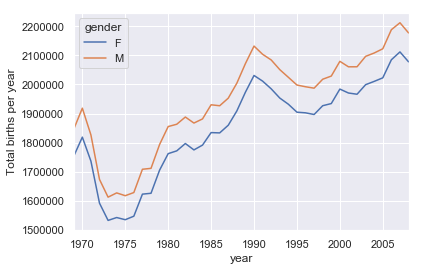

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # use seaborn style
births.pivot_table('births', index='year', columns='gender', 
                   aggfunc='sum').plot()
plt.ylabel("Total births per year")

In [58]:
data1 = births.pivot_table('births', index='year', columns='gender', 
                   aggfunc='sum')

In [60]:
data1['difference'] = np.abs(data1['M'] - data1['F'])

In [62]:
data1.head()

gender,F,M,difference
year,,,
1969,1753634,1846572,92938
1970,1819164,1918636,99472
1971,1736774,1826774,90000
1972,1592347,1673888,81541
1973,1533102,1613023,79921


Text(0, 0.5, 'Total births per year')

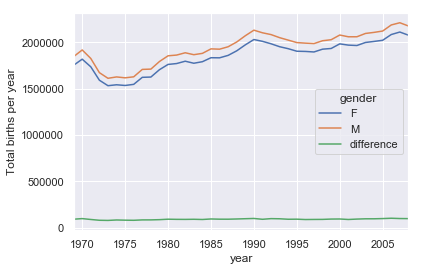

In [64]:
data1.plot()
plt.ylabel("Total births per year")

The difference of the births number is looks quite steady between men and women and with the number of births of men is larger than women